In [14]:
from collections import Counter
import pandas as pd
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import numpy as np
from collections import defaultdict
import pandas as pd
import gzip
from sklearn.utils import shuffle
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from pandas import DataFrame 
from sklearn.neighbors import NearestNeighbors


In [3]:
already_extracted=True
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

if already_extracted:
    df = pd.read_pickle('../reviews_Kindle_Store_5.h5')
else:
    df = getDF('../reviews_Kindle_Store_5.json.gz')


In [36]:
df=pd.read_csv('../reviews_Kindle_Store_10.csv')

In [37]:
df.columns

Index([u'reviewerID', u'asin', u'reviewerName', u'helpful', u'reviewText',
       u'overall', u'summary', u'unixReviewTime', u'reviewTime', u'n', u'nn'],
      dtype='object')

In [47]:
df.drop(['unixReviewTime', 'reviewTime','reviewerName','n','nn'],axis=1)

,reviewerID,asin,helpful,reviewText,overall,summary,sentiments,corrected_sent_score
221102,A2HK10525FSCSL,B00C5K3I8O,"[0, 0]",I was given this book in exchange for an hones...,5,Hilarious,0.7184,0.2184
7079,AYVF8U423IRKG,B003RWS5Q4,"[0, 0]",great book. just imagine what we could do if i...,5,Perfect crime,0.9022,0.4022
417291,A1YPL39YAQZWW,B00II04118,"[2, 4]",Loving Nate is the story of Leah falling in lo...,3,Not Mr. Perfect,0.9719,0.4719
313367,AOFEF95ER28BO,B00F7CJKAC,"[1, 4]",Honestly this book did not keep my interest. I...,1,Not interesting enough,0.1331,0.0000
123822,A1PB97BLMR9X2S,B008YQS5L8,"[1, 1]","This book was such a surprising read, and so m...",5,Toss out Stale Ideas and Preconceptions!,0.9797,0.4797
216456,A1FV7NRYK7Z4E,B00C0ULZ84,"[0, 0]","A novel suitable for you who like simple, dire...",5,"Cute, Funny and Usefull",0.9873,0.4873
385073,A1LPAJPQYR6M19,B00HMJVWFY,"[0, 0]",Everyone should read it..its a book that has a...,5,To say I loved this book would be such an unde...,0.9937,0.4937
62198,A1FJ6YD0TL90GN,B006HW44RK,"[0, 0]",After reading a few reviews (good and bad) on ...,4,Good,0.6927,0.1927
52269,A234DJA1EQM29E,B005XN8NKS,"[1, 1]",This was truly a worth wile read for 2013 I wh...,5,Loved the whole series,0.8832,0.3832
176760,A3UYFIBRFR6ML1,B00AV07RAK,"[1, 1]",This was a wonderful story. It's about a wido...,4,Wronged,0.8238,0.3238


In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()
df['sentiments'] = [sent.polarity_scores(str(row['reviewText']))['compound'] for index, row in df.iterrows()]

In [41]:
def adjust_score(score):
    if score >0:
      return  max(0,score-0.5)
    else:
       return min(0,score+0.5)
    
df['corrected_sent_score'] = [adjust_score(row['sentiments']) for index, row in df.iterrows()]

In [42]:
df = shuffle(df)

In [48]:
from sklearn.model_selection import train_test_split
Training_DataFrame, Testing_DataFrame = train_test_split(df, test_size=0.1)

In [49]:
Training_DataFrame.to_pickle('../reviews_Kindle_Store_10_training.h5')

In [50]:
Testing_DataFrame.to_pickle('../reviews_Kindle_Store_10_testing.h5')

In [51]:
df.to_pickle('../reviews_Kindle_Store_10.h5')

In [46]:
df[:2]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,n,nn,sentiments,corrected_sent_score
221102,A2HK10525FSCSL,B00C5K3I8O,m pollard,"[0, 0]",I was given this book in exchange for an hones...,5,Hilarious,1403308800,"06 21, 2014",159,12,0.7184,0.2184
7079,AYVF8U423IRKG,B003RWS5Q4,"Deborah ""tattoostats""","[0, 0]",great book. just imagine what we could do if i...,5,Perfect crime,1399075200,"05 3, 2014",13,115,0.9022,0.4022


In [15]:
#function for tokenizing summary
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

In [11]:
cluster = df.groupby("overall")["summary"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv")
cluster1["summaryClean"] = cluster1["summary"].apply(cleanReviews)

In [16]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

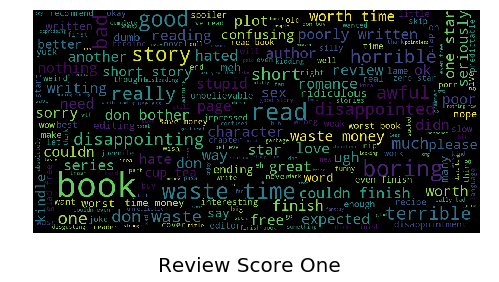

In [17]:
show_wordcloud(cluster1["summaryClean"][0], title = "Review Score One")

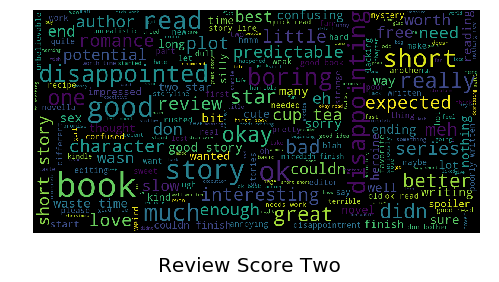

In [18]:
show_wordcloud(cluster1["summaryClean"][1] , title = "Review Score Two")

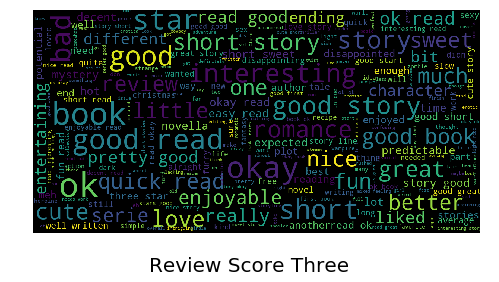

In [19]:
show_wordcloud(cluster1["summaryClean"][2], title = "Review Score Three")

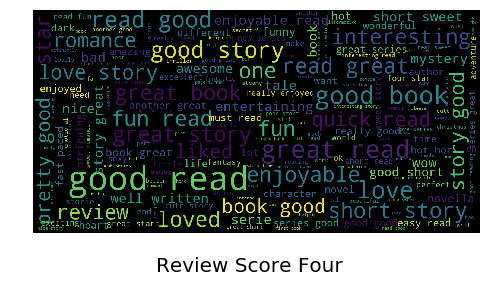

In [20]:
show_wordcloud(cluster1["summaryClean"][3], title = "Review Score Four")

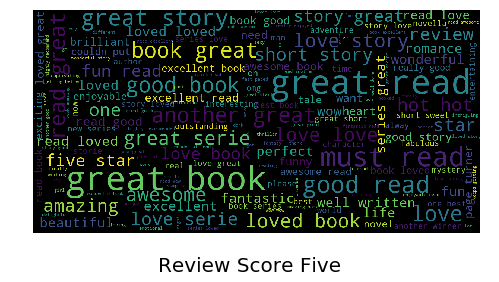

In [21]:
show_wordcloud(cluster1["summaryClean"][4], title = "Review Score Five")

In [23]:
rating_counts= df.groupby(['overall']).size().reset_index(name='counts')

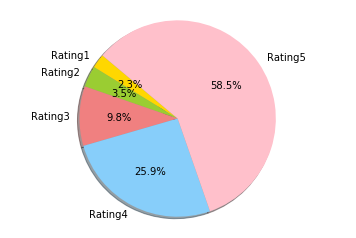

In [32]:
import plotly.plotly as py
import plotly.graph_objs as go

labels = ['Rating1','Rating2','Rating3','Rating4','Rating5']
values = rating_counts.counts

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(values, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()